In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#SET A DATAFRAME
df = pd.read_csv('Gold15-18.csv')
df=df.rename(columns={'Adj Close':'Close'})
import datetime
Gold_price = df.Close
df['Dates'] = pd.to_datetime(df['Date'])
Date = df['Date'] #String type
Dates = df['Dates'] #Date type 
d = {'Date': Dates, 'Gold_price': Gold_price}
df = pd.DataFrame(data=d)
df=df.dropna()
df = df.set_index('Date')

In [24]:
index = df.index
df.index = index.to_period('D') #To period type

# K=2

In [4]:
# prepare Fourier terms, k=2
exog = pd.DataFrame({'date': df.Gold_price.index})
exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='D'))
exog['sin220'] = np.sin(2 * np.pi * exog.index.dayofyear / 220)
exog['cos220'] = np.cos(2 * np.pi * exog.index.dayofyear / 220)
exog['sin220_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 220)
exog['cos220_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 220)
exog = exog.drop(columns=['date'])

#Train/Test
exog_to_train = exog.iloc[:997]
exog_to_test = exog.iloc[997:]

In [26]:
#df.index = df.index.to_period(freq='D')
#Train/Test Gold_price
y_to_train = df.Gold_price.iloc[:997]
y_to_test = df.Gold_price.iloc[997:]

In [125]:
# Fourier - ARIMA model
F_ARIMA = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0),exog = exog_to_train)
results_F_ARIMA= F_ARIMA.fit(disp=True)

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [126]:
print(results_F_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Gold_price   No. Observations:                  997
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3777.160
Date:                Mon, 07 Sep 2020   AIC                           7568.320
Time:                        11:51:19   BIC                           7602.647
Sample:                             0   HQIC                          7581.369
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220         0.1693      0.692      0.245      0.807      -1.187       1.525
cos220        -0.9050      0.562     -1.610      0.107      -2.006       0.196
sin220_2      -0.0465      0.557     -0.083      0.9

In [7]:
#Evaluation
forecast_f2 = results_F_ARIMA.get_forecast(steps=250,exog=exog_to_test).summary_frame()

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [19]:
# Compute the mean square error
mse_f2 = ((forecast_f2['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f2, 2)))
print("-----------------------------------")

-----------------------------------
MSE of the forecasts is 3133.87
-----------------------------------


In [23]:
#RMSE
rmse_f2 = np.sqrt(mse_f2)
rmse_f2

55.98098940407889

In [20]:
EPSILON = 1e-10
def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted
def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)

In [21]:
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))
def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))

In [24]:
mae(y_to_test.values,forecast_f2['mean'].values )

50.15951382021049

In [25]:
mape(y_to_test.values,forecast_f2['mean'].values)

0.040109988285113266

# k=4

In [131]:
# prepare Fourier terms, k=2
exog4 = pd.DataFrame({'date': df.Gold_price.index})
exog4= exog4.set_index(pd.PeriodIndex(exog4['date'], freq='D'))
exog4['sin220'] = np.sin(2 * np.pi * exog4.index.dayofyear / 220)
exog4['cos220'] = np.cos(2 * np.pi * exog4.index.dayofyear / 220)
exog4['sin220_2'] = np.sin(4 * np.pi * exog4.index.dayofyear / 220)
exog4['cos220_2'] = np.cos(4 * np.pi * exog4.index.dayofyear / 220)
exog4['sin220_2'] = np.sin(4 * np.pi * exog4.index.dayofyear / 220)
exog4['cos220_2'] = np.cos(4 * np.pi * exog4.index.dayofyear / 220)
exog4['sin220_3'] = np.sin(8 * np.pi * exog4.index.dayofyear / 220)
exog4['cos220_3'] = np.cos(8 * np.pi * exog4.index.dayofyear / 220)
exog4['sin220_4'] = np.sin(8*2 * np.pi * exog4.index.dayofyear / 220)
exog4['cos220_4'] = np.cos(8*2 * np.pi * exog4.index.dayofyear / 220)
exog4 = exog4.drop(columns=['date'])

#Train/Test
exog_to_train4 = exog4.iloc[:997]
exog_to_test4 = exog4.iloc[997:]

In [132]:
# Fourier - ARIMA model  4
F_ARIMA4 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0),exog = exog_to_train4)
results_F_ARIMA4= F_ARIMA4.fit(disp=True)
print(results_F_ARIMA4.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:             Gold_price   No. Observations:                  997
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3775.939
Date:                Mon, 07 Sep 2020   AIC                           7573.878
Time:                        12:04:23   BIC                           7627.819
Sample:                             0   HQIC                          7594.384
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220         0.0508      0.776      0.065      0.948      -1.471       1.573
cos220        -0.7261      0.648     -1.120      0.263      -1.997       0.545
sin220_2      -0.0636      0.569     -0.112      0.9

In [133]:
#Evaluation
forecast_f4 = results_F_ARIMA4.get_forecast(steps=250,exog=exog_to_test4).summary_frame()

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [134]:
# Compute the mean square error
mse_f4 = ((forecast_f4['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f4, 2)))
print("-----------------------------------")

-----------------------------------
MSE of the forecasts is 3171.72
-----------------------------------


In [154]:
#RMSE
rmse_f4 = np.sqrt(mse_f4)
rmse_f4

56.31803304698813

In [155]:
mae(y_to_test.values,forecast_f4['mean'].values )

50.15951382021049

In [156]:
mape(y_to_test.values,forecast_f4['mean'].values )

0.040261413182967894

# K=6

In [127]:
# prepare Fourier terms, k=2
exog6 = pd.DataFrame({'date': df.Gold_price.index})
exog6= exog6.set_index(pd.PeriodIndex(exog6['date'], freq='D'))
exog6['sin220'] = np.sin(2 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220'] = np.cos(2 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_2'] = np.sin(4 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_2'] = np.cos(4 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_2'] = np.sin(4 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_2'] = np.cos(4 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_3'] = np.sin(8 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_3'] = np.cos(8 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_4'] = np.sin(8*2 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_4'] = np.cos(8*2 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_5'] = np.sin(8*2*2 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_5'] = np.cos(8*2*2 * np.pi * exog6.index.dayofyear / 220)
exog6['sin220_6'] = np.sin(8*2*2*2 * np.pi * exog6.index.dayofyear / 220)
exog6['cos220_6'] = np.cos(8*2*2*2 * np.pi * exog6.index.dayofyear / 220)
exog6 = exog6.drop(columns=['date'])

#Train/Test
exog_to_train6 = exog6.iloc[:997]
exog_to_test6 = exog6.iloc[997:]

In [128]:
# Fourier - ARIMA model  6
F_ARIMA6 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0),exog = exog_to_train6)
results_F_ARIMA6= F_ARIMA6.fit(disp=True)
print(results_F_ARIMA6.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:             Gold_price   No. Observations:                  997
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3772.363
Date:                Mon, 07 Sep 2020   AIC                           7574.725
Time:                        12:01:42   BIC                           7648.281
Sample:                             0   HQIC                          7602.687
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220         0.0255      0.788      0.032      0.974      -1.519       1.571
cos220        -0.7157      0.663     -1.080      0.280      -2.015       0.583
sin220_2       0.0016      0.571      0.003      0.9

In [31]:
#Evaluation
forecast_f6 = results_F_ARIMA6.get_forecast(steps=250,exog=exog_to_test6).summary_frame()

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [33]:
# Compute the mean square error
mse_f6 = ((forecast_f6['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f6, 2)))
print("-----------------------------------")

-----------------------------------
MSE of the forecasts is 3212.4
-----------------------------------


In [34]:
#RMSE
rmse_f6 = np.sqrt(mse_f6)
rmse_f6

56.67802601449581

In [35]:
mae(y_to_test.values,forecast_f6['mean'].values )

50.35197726481527

In [36]:
mape(y_to_test.values,forecast_f6['mean'].values )

0.04032875338367707

# K=10

In [136]:
# prepare Fourier terms, k=2
exog10 = pd.DataFrame({'date': df.Gold_price.index})
exog10= exog10.set_index(pd.PeriodIndex(exog10['date'], freq='D'))
exog10['sin220'] = np.sin(2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220'] = np.cos(2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_2'] = np.sin(4 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_2'] = np.cos(4 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_2'] = np.sin(4 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_2'] = np.cos(4 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_3'] = np.sin(8 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_3'] = np.cos(8 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_4'] = np.sin(8*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_4'] = np.cos(8*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_5'] = np.sin(8*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_5'] = np.cos(8*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_6'] = np.sin(8*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_6'] = np.cos(8*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_7'] = np.sin(8*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_7'] = np.cos(8*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_8'] = np.sin(8*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_8'] = np.cos(8*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_9'] = np.sin(8*2*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_9'] = np.cos(8*2*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['sin220_10'] = np.sin(8*2*2*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10['cos220_10'] = np.cos(8*2*2*2*2*2*2*2 * np.pi * exog10.index.dayofyear / 220)
exog10 = exog10.drop(columns=['date'])

#Train/Test
exog_to_train10 = exog10.iloc[:997]
exog_to_test10 = exog10.iloc[997:]

In [137]:
# Fourier - ARIMA model  10
F_ARIMA10 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0),exog = exog_to_train10)
results_F_ARIMA10 = F_ARIMA10.fit(disp=True)
print(results_F_ARIMA10.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:             Gold_price   No. Observations:                  997
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3768.054
Date:                Mon, 07 Sep 2020   AIC                           7582.109
Time:                        12:35:09   BIC                           7694.895
Sample:                             0   HQIC                          7624.984
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220        -0.0203      0.802     -0.025      0.980      -1.591       1.551
cos220        -0.7928      0.662     -1.199      0.231      -2.089       0.504
sin220_2      -0.0694      0.573     -0.121      0.9

In [41]:
#Evaluation
forecast_f10 = results_F_ARIMA10.get_forecast(steps=250,exog=exog_to_test10).summary_frame()

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [44]:
# Compute the mean square error
mse_f10 = ((forecast_f10['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f10, 2)))
print("-----------------------------------")

-----------------------------------
MSE of the forecasts is 3173.82
-----------------------------------


In [45]:
#RMSE
rmse_f10 = np.sqrt(mse_f10)
rmse_f10

56.336641951678665

In [46]:
mae(y_to_test.values,forecast_f10['mean'].values )

50.260159174072605

In [47]:
mape(y_to_test.values,forecast_f10['mean'].values )

0.04022339186444721

# K=12

In [147]:
# prepare Fourier terms, k=2
exog12 = pd.DataFrame({'date': df.Gold_price.index})
exog12= exog12.set_index(pd.PeriodIndex(exog12['date'], freq='D'))
exog12['sin220'] = np.sin(2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220'] = np.cos(2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_2'] = np.sin(4 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_2'] = np.cos(4 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_2'] = np.sin(4 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_2'] = np.cos(4 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_3'] = np.sin(8 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_3'] = np.cos(8 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_4'] = np.sin(8*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_4'] = np.cos(8*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_5'] = np.sin(8*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_5'] = np.cos(8*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_6'] = np.sin(8*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_6'] = np.cos(8*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_7'] = np.sin(8*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_7'] = np.cos(8*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_8'] = np.sin(8*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_8'] = np.cos(8*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_9'] = np.sin(8*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_9'] = np.cos(8*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_10'] = np.sin(8*2*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_10'] = np.cos(8*2*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_11'] = np.sin(8*2*2*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_11'] = np.cos(8*2*2*2*2*2*2*2*2 * np.pi * exog12.index.dayofyear / 220)
exog12['sin220_12'] = np.sin(8*2*2*2*2*2*2*2*4 * np.pi * exog12.index.dayofyear / 220)
exog12['cos220_12'] = np.cos(8*2*2*2*2*2*2*2*4 * np.pi * exog12.index.dayofyear / 220)
exog12 = exog12.drop(columns=['date'])

#Train/Test
exog_to_train12 = exog12.iloc[:997]
exog_to_test12 = exog12.iloc[997:]

In [148]:
# Fourier - ARIMA model  12
F_ARIMA12 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0),exog = exog_to_train12)
results_F_ARIMA12 = F_ARIMA12.fit(disp=True)
print(results_F_ARIMA12.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:             Gold_price   No. Observations:                  997
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -3767.709
Date:                Mon, 07 Sep 2020   AIC                           7589.418
Time:                        13:20:35   BIC                           7721.819
Sample:                             0   HQIC                          7639.750
                                - 997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220         0.0011      0.813      0.001      0.999      -1.593       1.595
cos220        -0.8020      0.681     -1.178      0.239      -2.136       0.532
sin220_2      -0.0833      0.575     -0.145      0.8

In [149]:
#Evaluation
forecast_f12 = results_F_ARIMA12.get_forecast(steps=250,exog=exog_to_test12).summary_frame()

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [150]:
# Compute the mean square error
mse_f12 = ((forecast_f12['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f12, 2)))
print("-----------------------------------")

-----------------------------------
MSE of the forecasts is 3166.82
-----------------------------------


In [151]:
#RMSE
rmse_f12 = np.sqrt(mse_f12)
rmse_f12

56.27447279619842

In [152]:
mae(y_to_test.values,forecast_f12['mean'].values )

50.24658341613789

In [153]:
mape(y_to_test.values,forecast_f12['mean'].values )

0.040206094026927285

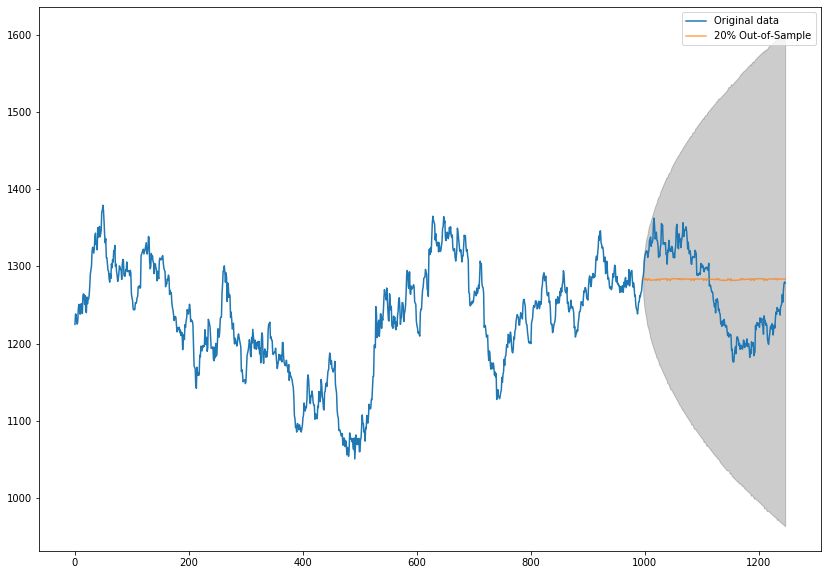

In [183]:
ax = Gold_price.plot(label='Original data')
forecast_f2['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f2.index,
                forecast_f2.iloc[:, 2],
                forecast_f2.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

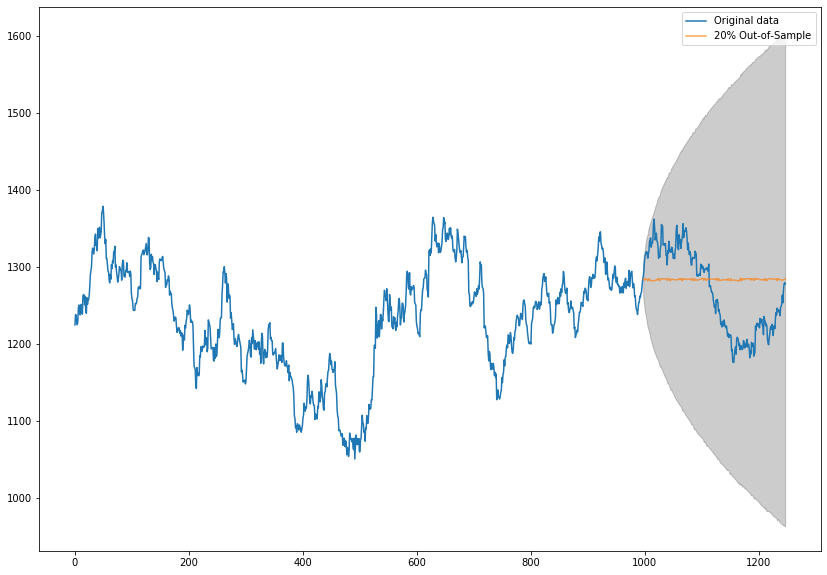

In [185]:
ax = Gold_price.plot(label='Original data')
forecast_f4['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f4.index,
                forecast_f4.iloc[:, 2],
                forecast_f4.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

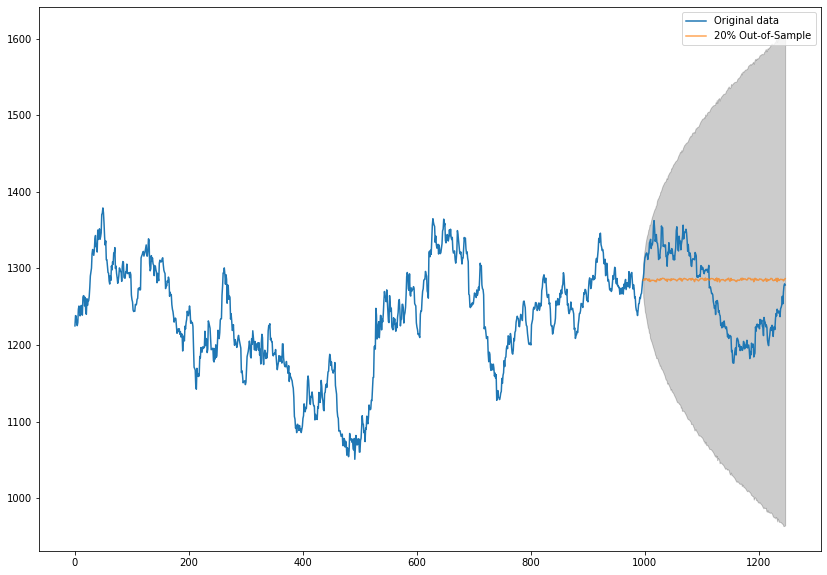

In [184]:
ax = Gold_price.plot(label='Original data')
forecast_f6['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f6.index,
                forecast_f6.iloc[:, 2],
                forecast_f6.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

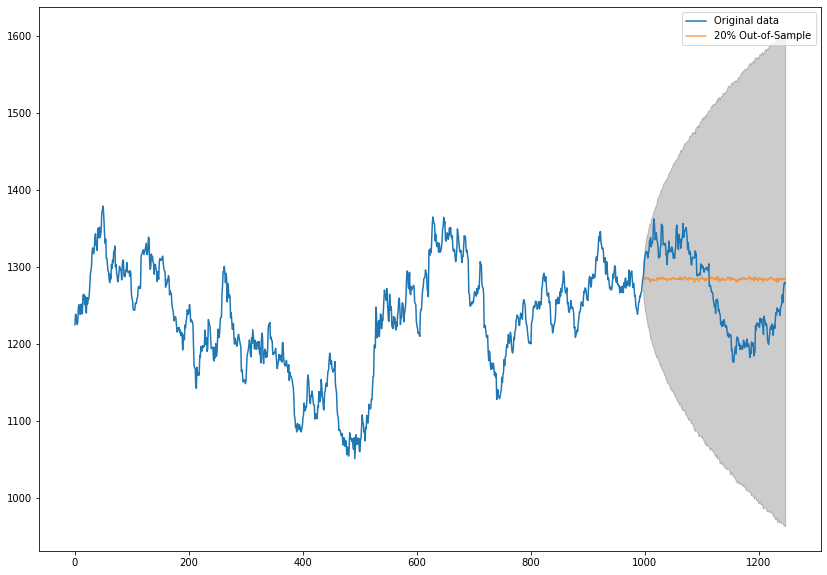

In [186]:
ax = Gold_price.plot(label='Original data')
forecast_f10['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f10.index,
                forecast_f10.iloc[:, 2],
                forecast_f10.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

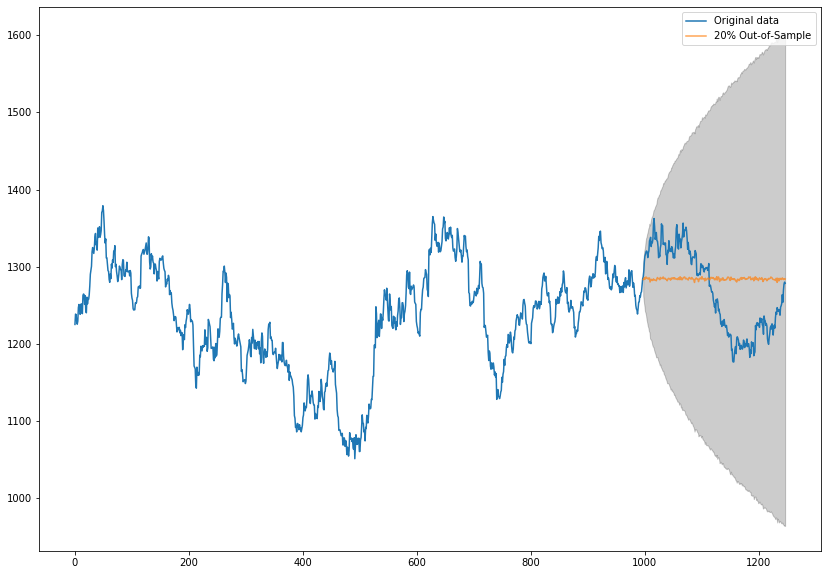

In [187]:
ax = Gold_price.plot(label='Original data')
forecast_f12['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f12.index,
                forecast_f12.iloc[:, 2],
                forecast_f12.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

# Fourier Seasonal

In [27]:
# Fourier - ARIMA model2
F_ARIMA2_sea = sm.tsa.statespace.SARIMAX(y_to_train, order=(2,1,0), seasonal_order = (2,1,0,30),exog = exog_to_train)
results_F_ARIMA2_sea = F_ARIMA2_sea.fit(disp=True)
print(results_F_ARIMA2_sea.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                         Gold_price   No. Observations:                  997
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 30)   Log Likelihood               -3816.336
Date:                            Thu, 10 Sep 2020   AIC                           7650.672
Time:                                    23:42:47   BIC                           7694.531
Sample:                                         0   HQIC                          7667.369
                                            - 997                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin220        -0.1190      0.695     -0.171      0.864      -1.482       1.244
cos220        -0.8377      0.557   

In [17]:
df.Gold_price[:997].index

DatetimeIndex(['2014-02-01', '2014-03-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-26'],
              dtype='datetime64[ns]', name='Date', length=997, freq=None)

In [18]:
exog_to_train.index

PeriodIndex(['2014-02-01', '2014-03-01', '2014-06-01', '2014-07-01',
             '2014-08-01', '2014-09-01', '2014-10-01', '2014-01-13',
             '2014-01-14', '2014-01-15',
             ...
             '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
             '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
             '2017-12-22', '2017-12-26'],
            dtype='period[D]', name='date', length=997, freq='D')

In [158]:
#Evaluation
forecast_f2_sea = results_F_ARIMA2_sea.get_forecast(steps=250,exog=exog_to_test).summary_frame()
# Compute the mean square error
mse_f2_sea = ((forecast_f2_sea['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f2_sea, 2)))
print("-----------------------------------")

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


-----------------------------------
MSE of the forecasts is 3130.92
-----------------------------------


In [160]:
#RMSE
rmse_f2_sea = np.sqrt(mse_f2_sea)
rmse_f2

55.98098940407889

In [95]:
mae(y_to_test.values,forecast_f2_sea['mean'].values )

49.73973604092698

In [96]:
mape(y_to_test.values,forecast_f2_sea['mean'].values )

0.03971594989449028

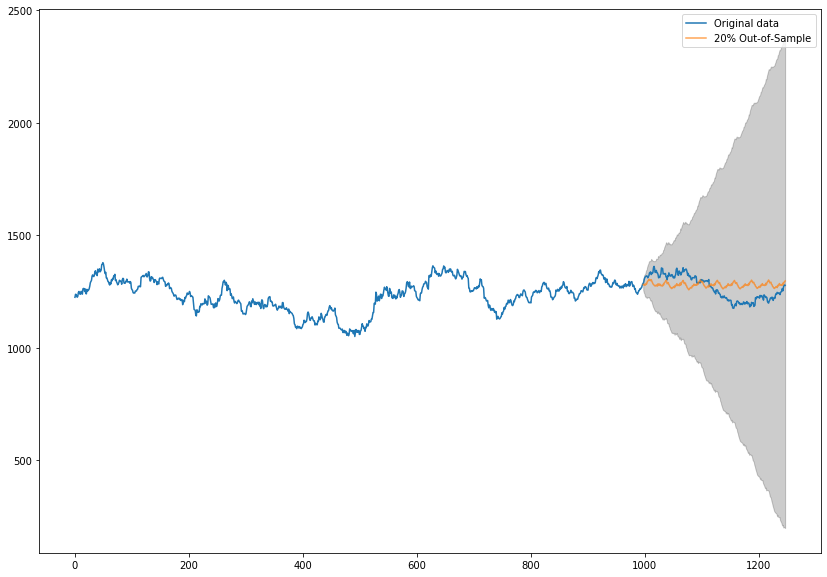

In [173]:
#k=2, s=30
ax = Gold_price.plot(label='Original data')
forecast_f2_sea['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f2_sea.index,
                forecast_f2_sea.iloc[:, 2],
                forecast_f2_sea.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

# In summary K=2, s=30 is the best model

# k=2, s=100

In [111]:
# Fourier - ARIMA model2
F_ARIMA2_sea100 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0), seasonal_order = (2,1,0,100),exog = exog_to_train)
results_F_ARIMA2_sea100 = F_ARIMA2_sea100.fit(disp=True)
print(results_F_ARIMA2_sea100.summary())

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                          Gold_price   No. Observations:                  997
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 100)   Log Likelihood               -3551.285
Date:                             Sun, 06 Sep 2020   AIC                           7120.570
Time:                                     15:04:14   BIC                           7163.752
Sample:                                          0   HQIC                          7137.069
                                             - 997                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin365         0.3337      0.701      0.476      0.634      -1.040       1.708
cos365        -0.9019      

In [112]:
#Evaluation
forecast_f2_sea100 = results_F_ARIMA2_sea100.get_forecast(steps=250,exog=exog_to_test).summary_frame()
# Compute the mean square error
mse_f2_sea100 = ((forecast_f2_sea100['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f2_sea100, 2)))
print("-----------------------------------")

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


-----------------------------------
MSE of the forecasts is 7033.03
-----------------------------------


In [181]:
forecast_f2_sea100['mean'],y_to_test

(997     1282.000163
 998     1277.858661
 999     1278.625861
 1000    1278.751856
 1001    1296.526469
            ...     
 1242    1316.797463
 1243    1323.489100
 1244    1334.010224
 1245    1329.162147
 1246    1334.596495
 Name: mean, Length: 250, dtype: float64,
 Date
 2017-12-27    1287.000000
 2017-12-28    1294.099976
 2017-12-29    1306.300049
 2018-02-01    1313.699951
 2018-03-01    1316.199951
                  ...     
 2018-12-21    1253.800049
 2018-12-26    1269.199951
 2018-12-27    1277.300049
 2018-12-28    1279.900024
 2018-12-31    1278.300049
 Freq: D, Name: Gold_price, Length: 250, dtype: float64)

In [161]:
#RMSE
rmse_f2_sea100 = np.sqrt(mse_f2_sea100)
rmse_f2_sea100

83.86318229957548

In [162]:
mae(y_to_test.values,forecast_f2_sea100['mean'].values )

71.23098379429439

In [163]:
mape(y_to_test.values,forecast_f2_sea100['mean'].values )

0.057510814855197594

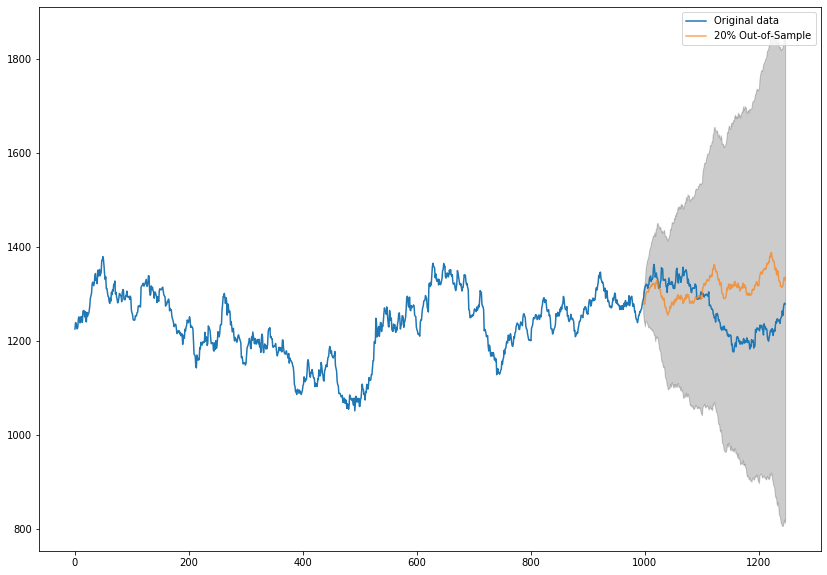

In [189]:
#k=2, s=100
ax = Gold_price.plot(label='Original data')
forecast_f2_sea100['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f2_sea100.index,
                forecast_f2_sea100.iloc[:, 2],
                forecast_f2_sea100.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

# K=2, s=60

In [116]:
# Fourier - ARIMA model2
F_ARIMA2_sea60 = sm.tsa.statespace.SARIMAX(df.Gold_price[:997], order=(2,1,0), seasonal_order = (2,1,0,60),exog = exog_to_train)
results_F_ARIMA2_sea100 = F_ARIMA2_sea60.fit(disp=True)

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


NameError: name 'results_F_ARIMA2_sea60' is not defined

In [118]:
results_F_ARIMA2_sea60 = results_F_ARIMA2_sea100 #Fix Bug

In [119]:
print(results_F_ARIMA2_sea60.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Gold_price   No. Observations:                  997
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 60)   Log Likelihood               -3683.906
Date:                            Sun, 06 Sep 2020   AIC                           7385.811
Time:                                    16:38:27   BIC                           7429.386
Sample:                                         0   HQIC                          7402.425
                                            - 997                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sin365         0.6755      0.668      1.012      0.312      -0.633       1.984
cos365        -1.1327      0.601   

In [120]:
#Evaluation
forecast_f2_sea60 = results_F_ARIMA2_sea60.get_forecast(steps=250,exog=exog_to_test).summary_frame()
# Compute the mean square error
mse_f2_sea60 = ((forecast_f2_sea60['mean'].values- y_to_test.values) ** 2).mean()
print("-----------------------------------")
print('MSE of the forecasts is {}'.format(round(mse_f2_sea60, 2)))
print("-----------------------------------")

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


-----------------------------------
MSE of the forecasts is 9084.0
-----------------------------------


In [166]:
#RMSE
rmse_f2_sea60 = np.sqrt(mse_f2_sea60)
rmse_f2_sea60

95.31002974469857

In [164]:
mae(y_to_test.values,forecast_f2_sea60['mean'].values )

78.04393237841539

In [165]:
mape(y_to_test.values,forecast_f2_sea60['mean'].values )

0.06335220799355352

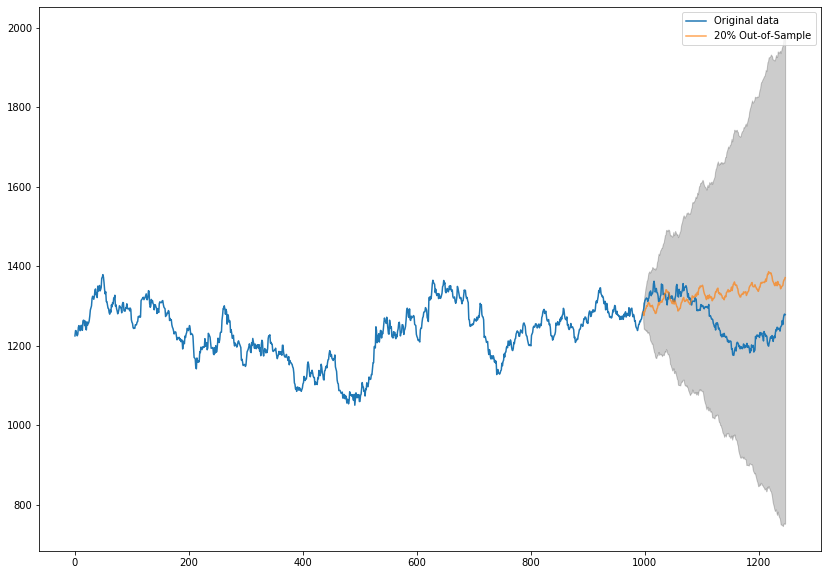

In [188]:
#k=2, s=60
ax = Gold_price.plot(label='Original data')
forecast_f2_sea60['mean'].plot(ax=ax,figsize = (14,10),kind='line' ,label='20% Out-of-Sample', alpha=.7)
ax.fill_between(forecast_f2_sea60.index,
                forecast_f2_sea60.iloc[:, 2],
                forecast_f2_sea60.iloc[:, 3], color='k', alpha=.2)
plt.legend()
plt.show()

In [177]:
forecast_f2_sea60['mean'].to_csv('60.csv')

In [182]:
forecast_f2_sea100['mean'].to_csv('100.csv')

In [192]:
df

,Gold_price
Date,
2014-02-01,1225.000000
2014-03-01,1238.400024
2014-06-01,1237.800049
2014-07-01,1229.400024
2014-08-01,1225.300049
...,...
2018-12-21,1253.800049
2018-12-26,1269.199951
2018-12-27,1277.300049


# Future Value

In [28]:
#Create EXOG_forecast
data_forecast = pd.date_range(start='1/1/2019',periods = 30, freq ='D' )
exog2_forecast = pd.DataFrame({'date':data_forecast})
exog2_forecast= exog2_forecast.set_index(pd.PeriodIndex(exog2_forecast['date'], freq='D'))
exog2_forecast['sin220'] = np.sin(2 * np.pi * exog2_forecast.index.dayofyear / 220)
exog2_forecast['cos220'] = np.cos(2 * np.pi * exog2_forecast.index.dayofyear / 220)
exog2_forecast['sin220_2'] = np.sin(4 * np.pi * exog2_forecast.index.dayofyear / 220)
exog2_forecast['cos220_2'] = np.cos(4 * np.pi * exog2_forecast.index.dayofyear / 220)

exog2_forecast =exog2_forecast.drop('date', axis=1)
exog2_forecast

,sin220,cos220,sin220_2,cos220_2
date,,,,
2019-01-01,0.028556,0.999592,0.057089,0.998369
2019-01-02,0.057089,0.998369,0.113991,0.993482
2019-01-03,0.085575,0.996332,0.170522,0.985354
2019-01-04,0.113991,0.993482,0.226497,0.974012
2019-01-05,0.142315,0.989821,0.281733,0.959493
2019-01-06,0.170522,0.985354,0.336049,0.941844
2019-01-07,0.198590,0.980083,0.389270,0.921124
2019-01-08,0.226497,0.974012,0.441221,0.897398
2019-01-09,0.254218,0.967147,0.491733,0.870746


In [29]:
exog_to_test

,sin220,cos220,sin220_2,cos220_2
date,,,,
2017-12-27,-0.774142,-0.633012,0.980083,-0.198590
2017-12-28,-0.791902,-0.610648,0.967147,-0.254218
2017-12-29,-0.809017,-0.587785,0.951057,-0.309017
2018-02-01,0.791902,0.610648,0.967147,-0.254218
2018-03-01,0.989821,-0.142315,-0.281733,-0.959493
...,...,...,...,...
2018-12-21,-0.654861,-0.755750,0.989821,0.142315
2018-12-26,-0.755750,-0.654861,0.989821,-0.142315
2018-12-27,-0.774142,-0.633012,0.980083,-0.198590


In [30]:
frames = [exog_to_test,exog2_forecast]
exog_forecast_f2 = pd.concat(frames)

In [31]:
exog_forecast_f2

,sin220,cos220,sin220_2,cos220_2
date,,,,
2017-12-27,-0.774142,-0.633012,0.980083,-0.198590
2017-12-28,-0.791902,-0.610648,0.967147,-0.254218
2017-12-29,-0.809017,-0.587785,0.951057,-0.309017
2018-02-01,0.791902,0.610648,0.967147,-0.254218
2018-03-01,0.989821,-0.142315,-0.281733,-0.959493
...,...,...,...,...
2019-01-26,0.676175,0.736741,0.996332,0.085575
2019-01-27,0.696938,0.717132,0.999592,0.028556
2019-01-28,0.717132,0.696938,0.999592,-0.028556


In [32]:
Sea30_f2 = results_F_ARIMA2_sea.get_forecast(steps=280,exog = exog_forecast_f2).summary_frame() #One seasonal cycle forecast

/Users/rodtour/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [227]:
Sea30_f2[251:]

Gold_price,mean,mean_se,mean_ci_lower,mean_ci_upper
1248,1295.046451,566.258300,185.200577,2404.892324
1249,1287.670902,569.237686,171.985540,2403.356265
1250,1289.383335,572.201558,167.888889,2410.877781
1251,1290.818554,575.150158,163.544959,2418.092149
1252,1281.637445,578.083718,148.614178,2414.660711
1253,1279.451885,581.002466,140.707977,2418.195793
1254,1272.003912,583.906624,127.567958,2416.439866
1255,1269.403583,586.796410,119.303753,2419.503412
1256,1265.262051,589.672034,109.526102,2420.997999
1257,1262.444400,592.533702,101.099684,2423.789115


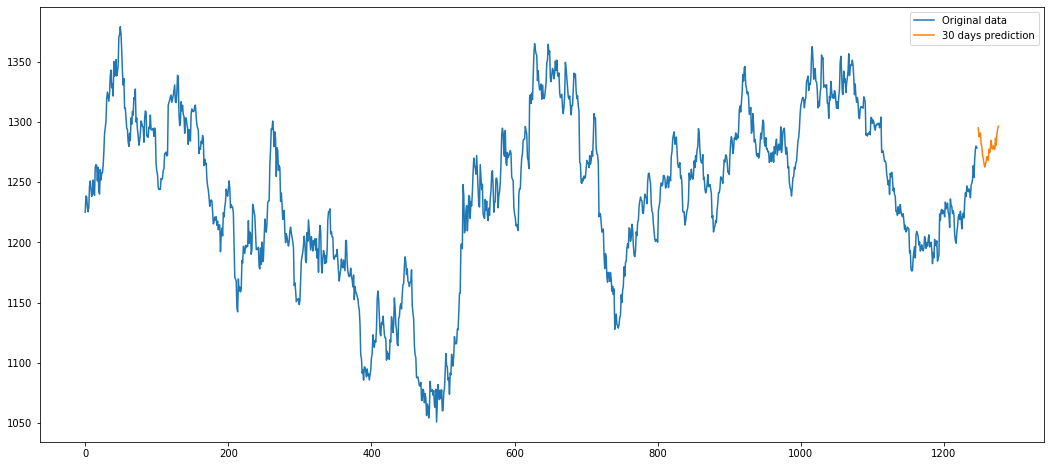

In [33]:
ax = Gold_price.plot(label='Original data')
Sea30_f2[251:]['mean'].plot(ax=ax, figsize = (18,8),kind='line' ,label='30 days prediction')
#ax.fill_between(Sea30_f2[251:].index, Sea30_f2[251:]['mean_ci_lower'],Sea30_f2[251:]['mean_ci_upper'],color='k', alpha =0.5)
plt.legend()
plt.show()
#Prediction